# Assignment 5
### Do all four questions.

# Helen Corbat

**1.** Let's review some basic matrix multiplication. When you have an $M \times N$ matrix $A$ with $M$ rows and $N$ columns, 
$$
A= \left[ \begin{array}{cccc} a_{11} & a_{12} & ... & a_{1N} \\
a_{21} & a_{22} & ... & a_{2N} \\
\vdots & \vdots & ... & \vdots \\
a_{M1} & a_{M2} & ... & a_{MN} 
\end{array} \right],
$$
and you right-multiply it by a vector
$$
x = \left[ \begin{array}{c} x_1 \\ x_2 \\ \vdots \\ x_N 
\end{array} \right],
$$
you get
$$
Ax = \left[ \begin{array}{c} \sum_{i=1}^N a_{1i} x_i \\ \sum_{i=1}^N a_{2i} x_i \\ \vdots \\ \sum_{i=1}^N a_{Mi} x_i 
\end{array} \right].
$$
This is just "matrix row times column vector" element-by-element, stacking the results into a new vector.

For this to make sense, $N$ must be the same for the matrix and the vector, but $M$ can be different from $N$. 

Let's play with some NumPy to see this. First we'll define a matrix $A$:

In [1]:
import numpy as np

A = np.array([ [1,2,3],
              [4,5,6],
              [7,8,9]])
A

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

a. Multiply $A$ times each of the following vectors using the @ operator. Explain which part of the $A$ matrix gets selected and explain why, using the definition of matrix multiplication. 

In [2]:
e_1 = np.array([1,0,0])
e_2 = np.array([0,1,0])
e_3 = np.array([0,0,1])

In [3]:
print(A@e_1)
print(A@e_2)
print(A@e_3)

[1 4 7]
[2 5 8]
[3 6 9]


For A@e_1, the first column elements (1,4,7) of matrix A was selected because e_1 has 1 as the first element, and 0s for the other two columns. A@e_2, the second column (2,5,8) was selected because e_2 has 1 as the second element, and 0s for the other two. A@e_3, the third column (3,6,9) was selected because e_3 has 1 as the third element, and 0s for the other two columns.

b. Now multiply $A$ times $u = (1,1,1)$. Explain the logic of the result with the definition of matrix multiplication.

In [4]:
u = np.ones(3)

In [5]:
print(A@u)

[ 6. 15. 24.]


Multiply A times u resulted a 1X3 matrix (6,15,24), and this outcome is basically a summation of each row of elments. For example, row 1 of matrix A are 1,2,3, then it 
became (1* 1)+(2* 1)+(3*1) = 6, and this logic applies to other rows as well to get 15 and 24.

c. Whenever a matrix has 1's on the diagonal and zeros everywhere else, we call it an **identity matrix**. What happens when you multiple $A$ times $x$ below? What happens when you multiple an identity matrix times any vector? Explain your result with the definition of matrix multiplication.

In [6]:
A = np.array([ [1,0,0],
              [0,1,0],
              [0,0,1]])
x = np.array([-2,4,11])


In [7]:
print(A@x)

[-2  4 11]


1X-2 + 4X0 + 11X0 = -2
0X-2 + 4X1 + 11X0 = 4
0X-2 + 4X0 + 11X1 = 11

in conclusion, multiplying the vector by identity matrix, results in the vector itself.

d. What if every row and column sum to 1, but the 1's are no longer on the diagonal? Multiple $A$ times $X$ below and explain the result. Create another matrix whose rows and columns sum to 1, but is not an identity matrix, and show how it permutes the values of $x$. 

In [8]:
A = np.array([ [0,0,1],
              [1,0,0],
              [0,1,0]])
x = np.array([-2,4,11])


In [9]:
print(A@x)

[11 -2  4]


-2X0 + 4X0 + 11X 1 = 11
-2X1 + 4X0 + 11X0 = -2
-2X0 + 4X1 + 11X0 = 4

As the 1's postion switched in a matrix, so the outcome permutes as well.

In [10]:
A = np.array([ [0,1,0],
              [0,0,1],
              [1,0,0]])
x = np.array([-2,4,11])

In [11]:
print(A@x)

[ 4 11 -2]


e. The next matrix $A$ could be a Markov transition matrix: Its columns sum to 1, and each entry $a_{ij}$ can be interpreted as the proportion of observations who moved from state $j$ to state $i$. Multiply $A$ by each of the vectors $e_1$, $e_2$, and $e_3$, and explain your results.

In [16]:
rng = np.random.default_rng(100)
A = rng.random((3,3)) # Generate a random 3X3 matrix
sums = np.sum(A,axis=0) # Column sums
A = A/sums # Normalize the columns so they sum to 1
print(A)

[[0.50052958 0.24049286 0.18358131]
 [0.02574731 0.39251588 0.37907577]
 [0.47372311 0.36699127 0.43734292]]


f. For each of the vectors $e_1, e_2, e_3$, multiple $A$ times that vector 5 times. What answer do you get for each starting vector? Describe the behavior you observe.

In [19]:
print(A@(A@(A@(A@(A@e_1)))))

[0.29266551 0.27862515 0.42870935]


In [23]:
A1 = A@e_1
print(A1)
A2 = A@A1
print(A2)
A3 = A@A2
print(A3)
A4 = A@A3
print(A4)
A5 = A@A4
print(A5)

[0.50052958 0.02574731 0.47372311]
[0.34368862 0.20257047 0.45374091]
[0.30404142 0.26036337 0.43559521]
[0.29476439 0.27514859 0.43008701]
[0.29266551 0.27862515 0.42870935]


In [24]:
A1 = A@e_2
print(A1)
A2 = A@A1
print(A2)
A3 = A@A2
print(A3)
A4 = A@A3
print(A4)
A5 = A@A4
print(A5)

[0.24049286 0.39251588 0.36699127]
[0.28214379 0.29937825 0.41847795]
[0.29004438 0.28341002 0.42654561]
[0.29163968 0.2804039  0.42795643]
[0.29197422 0.27979983 0.42822595]


In [25]:
A1 = A@e_3
print(A1)
A2 = A@A1
print(A2)
A3 = A@A2
print(A3)
A4 = A@A3
print(A4)
A5 = A@A4
print(A5)

[0.18358131 0.37907577 0.43734292]
[0.26334088 0.31930609 0.41735304]
[0.28521895 0.29032145 0.4244596 ]
[0.29050361 0.28220175 0.42729464]
[0.29171646 0.2802254  0.42805814]


The resulting vectors add up to 1, but they change (sometimes increasing or decreasing).

*2.* Let's consider a simple Markov transition matrix over two states:
$$
T = \left[ \begin{array}{cc} p_{1\leftarrow 1} &  p_{1\leftarrow 2} \\
p_{2 \leftarrow 1} & p_{2 \leftarrow 2} \end{array}\right] 
$$
The arrows help visualize the transition a bit: This is the same index notation as usual, $p_{ij}$, but writing it $p_{i \leftarrow j}$ emphasizes that it's the proportion of times that state $j$ transitions to state $i$. Below, $T$ is given by
$$
T = \left[ \begin{array}{cc} .25 & .5 \\
.75 & .5 \end{array}\right].
$$

- Start in state 1, at the initial condition $[1,0]$. Multiply that vector by $T$. Write out the result in terms of the formula and compute the result in a code chunk below. What is this object you're looking at, in terms of proportions and transitions?
- Multiple by $T$ again. What do you get? This isn't a column of $T$. Explain in words what it is. (Hint: A forecast of what in what period?)
- Keep multiplying the current vector of outcomes by $T$. When does it start to settle down without changing further?
- Do the above analysis again, starting from the initial condition $[0,1]$. Do you get a different result?
- The take-away is that, in the long run, these chains settle down into the long-run proportions, and the sensitivity on initial conditions vanishes. 


In [26]:
T = np.array([[ 1/4, 1/2],
                 [ 3/4, 1/2 ]])

In [27]:
x = np.array([1,0])
print(T@x)

[0.25 0.75]


The result is a vector that represents probabilities of being in state of 0 or 1 after one period. In other words, 25% of things start in this condition will remain, and 75% will transition to the other state.

THe formula is (0.25X1)+(0.5X0) = 0.25, (0.75X1) + (0.5X0) = 0.75

In [31]:
x1 = T@x
print(T@x1)

[0.40000004 0.59999996]


After two periods of time, there is 43.75% chance that stays in one state, and 56.25% chance in the other state.

In [30]:
x = np.array([1,0])
for i in range(10):
    x = T@x
    print(x)


[0.25 0.75]
[0.4375 0.5625]
[0.390625 0.609375]
[0.40234375 0.59765625]
[0.39941406 0.60058594]
[0.40014648 0.59985352]
[0.39996338 0.60003662]
[0.40000916 0.59999084]
[0.39999771 0.60000229]
[0.40000057 0.59999943]


By the fourth transition, the results are settling to 0.4,0.6

In [32]:
x = np.array([0,1])
for i in range(10):
    x = T@x
    print(x)

[0.5 0.5]
[0.375 0.625]
[0.40625 0.59375]
[0.3984375 0.6015625]
[0.40039062 0.59960938]
[0.39990234 0.60009766]
[0.40002441 0.59997559]
[0.3999939 0.6000061]
[0.40000153 0.59999847]
[0.39999962 0.60000038]


Even though the initial states are different from the one above [1,0], but the outcomes settled down after the fourth transition as well, so it behaves similarly in a long term

3. Weather data

- Load the `cville_weather.csv` data. This includes data from Jan 4, 2024 to Feb 2, 2025. Are there any missing data issues?
- Based on the precipitation variable, `PRCP`, make a new variable called `rain` that takes the value 1 if `PRCP`>0 and 0 otherwise.
- Build a two-state Markov chain over the states 0 and 1 for the `rain` variable. 
- For your chain from c, how likely is it to rain if it was rainy yesterday? How likely is it to rain if it was clear yesterday?
- Starting from a clear day, forecast the distribution. How quickly does it converge to a fixed result? What if you start from a rainy day?
- Conditional on being rainy, plot a KDE of the `PRCP` variable.
- Describe one way of making your model better for forecasting and simulation the weather.

Congratulations, you now are a non-parametric meteorologist!

In [33]:
import pandas as pd
weather = pd.read_csv('cville_weather.csv')
weather.head()

,STATION,NAME,DATE,DAPR,DAPR_ATTRIBUTES,MDPR,MDPR_ATTRIBUTES,PRCP,PRCP_ATTRIBUTES,SNOW,SNOW_ATTRIBUTES,SNWD,SNWD_ATTRIBUTES
0,US1VACRC002,"CHARLOTTESVILLE 0.5 NNE, VA US",2024-01-04,NaN,NaN,NaN,NaN,0.03,",,N",NaN,NaN,NaN,NaN
1,US1VACRC002,"CHARLOTTESVILLE 0.5 NNE, VA US",2024-01-07,NaN,NaN,NaN,NaN,1.08,",,N",NaN,NaN,NaN,NaN
2,US1VACRC002,"CHARLOTTESVILLE 0.5 NNE, VA US",2024-01-09,NaN,NaN,NaN,NaN,0.24,",,N",NaN,NaN,NaN,NaN
3,US1VACRC002,"CHARLOTTESVILLE 0.5 NNE, VA US",2024-01-10,NaN,NaN,NaN,NaN,3.00,",,N",NaN,NaN,NaN,NaN
4,US1VACRC002,"CHARLOTTESVILLE 0.5 NNE, VA US",2024-01-24,NaN,NaN,NaN,NaN,0.00,",,N",0.0,",,N",NaN,NaN


In [34]:
weather.isna().sum()

STATION              0
NAME                 0
DATE                 0
DAPR               399
DAPR_ATTRIBUTES    399
MDPR               399
MDPR_ATTRIBUTES    399
PRCP                12
PRCP_ATTRIBUTES     12
SNOW               188
SNOW_ATTRIBUTES    188
SNWD               410
SNWD_ATTRIBUTES    410
dtype: int64

In [35]:
weather['rain'] = np.where(weather['PRCP'] >0,1,0)
weather.head()

,STATION,NAME,DATE,DAPR,DAPR_ATTRIBUTES,MDPR,MDPR_ATTRIBUTES,PRCP,PRCP_ATTRIBUTES,SNOW,SNOW_ATTRIBUTES,SNWD,SNWD_ATTRIBUTES,rain
0,US1VACRC002,"CHARLOTTESVILLE 0.5 NNE, VA US",2024-01-04,NaN,NaN,NaN,NaN,0.03,",,N",NaN,NaN,NaN,NaN,1
1,US1VACRC002,"CHARLOTTESVILLE 0.5 NNE, VA US",2024-01-07,NaN,NaN,NaN,NaN,1.08,",,N",NaN,NaN,NaN,NaN,1
2,US1VACRC002,"CHARLOTTESVILLE 0.5 NNE, VA US",2024-01-09,NaN,NaN,NaN,NaN,0.24,",,N",NaN,NaN,NaN,NaN,1
3,US1VACRC002,"CHARLOTTESVILLE 0.5 NNE, VA US",2024-01-10,NaN,NaN,NaN,NaN,3.00,",,N",NaN,NaN,NaN,NaN,1
4,US1VACRC002,"CHARLOTTESVILLE 0.5 NNE, VA US",2024-01-24,NaN,NaN,NaN,NaN,0.00,",,N",0.0,",,N",NaN,NaN,0


The majority of the data has missing values as shown above.

In [40]:
rain = np.array(weather['rain'])
tomorrow = rain[1:]
today = rain[:-1]
sunny_sunny = np.sum((today == 0)& (tomorrow == 0))
sunny_rain = np.sum((today == 0) & (tomorrow ==1))
rain_sunny = np.sum((today == 1) & (tomorrow == 0))
rain_rain = np.sum((today == 1) & (tomorrow == 1))
s_s = sunny_sunny/(sunny_sunny + sunny_rain)
s_r = sunny_rain/(sunny_sunny + sunny_rain)
r_s = rain_sunny/(rain_sunny + rain_rain)
r_r = rain_rain/(rain_sunny + rain_rain)

print(r_r)
print(s_r)
print(s_s)
print(r_s)

0.6480446927374302
0.2683982683982684
0.7316017316017316
0.35195530726256985


There is 65% chance that it is going to rain today if it was raining yesterday, and 27% chance that it is going to rain today if it was clear yesterday.

In [42]:
T = np.array([[s_s,r_s],[s_r,r_r]])
x = np.array([1,0])
for i in range(10):
    x = T@x
    print(x)

[0.73160173 0.26839827]
[0.62970529 0.37029471]
[0.59102067 0.40897933]
[0.57633419 0.42366581]
[0.57075852 0.42924148]
[0.56864174 0.43135826]
[0.56783811 0.43216189]
[0.56753302 0.43246698]
[0.56741719 0.43258281]
[0.56737321 0.43262679]


it converged after the fifth transition.

In [43]:
T = np.array([[s_s,r_s],[s_r,r_r]])
x = np.array([0,1])
for i in range(10):
    x = T@x
    print(x)

[0.35195531 0.64804469]
[0.48557388 0.51442612]
[0.5363017 0.4636983]
[0.55556033 0.44443967]
[0.5628718 0.4371282]
[0.56564757 0.43435243]
[0.56670139 0.43329861]
[0.56710146 0.43289854]
[0.56725335 0.43274665]
[0.56731101 0.43268899]


it converges exactly the same long term probability as the ones above.

<Axes: xlabel='PRCP', ylabel='Density'>

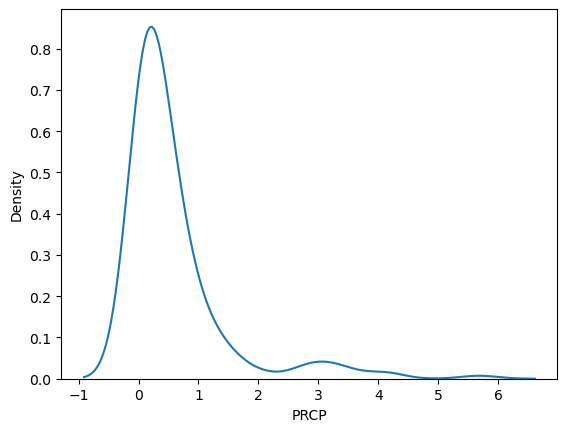

In [44]:
import seaborn as sns
rainy = weather['PRCP'].loc[weather['rain'] == 1]
sns.kdeplot(rainy)

Maybe instead of just predicting whether if it rains or not, we could also add on predicting how much would it rain.

4. Taxicab trajectories: Using the pickled taxicab data, we want to complete the exercise from class.

- For the taxicab trajectory data, determine your state space and clean your sequences of cab rides.
- Compute the transition matrix for the taxicab data between neighborhoods in Manhattan. Plot it in a heat map. What are the most common routes?
- Explain why taxicabs are most likely order 1, and not 2 or more.
- Starting at Hell's Kitchen, create a sequence of forecasts of where the cab is likely to be in 2, 3, 5, and 10 trips
- Starting at any neighborhood, iterate your forecast until it is no longer changing very much. Where do cabs spend most of their time working in Manhattan?

In [45]:
import pickle
file_path = "C:\\Users\\Owner\\OneDrive\\MSDS 2025\\DS5030_Understanding Uncertainty\\data\\taxicab.pkl"
with open(file_path, 'rb') as f: # Open the taxicab file
    taxi= pickle.load(f)

In [52]:
seq = pd.Series()
for trip in taxi:
    seq = pd.concat([seq,trip],ignore_index= True)



In [58]:
states = list(seq.unique())
print(states)
type(states)

['Outside Manhattan', 'Central Park', 'Upper East Side', 'Upper West Side', 'Lower East Side', 'Gramercy', 'Kips Bay', 'Midtown', 'Chelsea', 'Theater District', 'Financial District', 'Greenwich Village', 'Murray Hill', 'East Harlem', 'SoHo', "Hell's Kitchen", 'West Village', 'Battery Park City', 'Flatiron District', 'NoHo', 'Tribeca', 'Chinatown', 'Little Italy', 'East Village', 'Harlem', 'Washington Heights', 'Nolita', 'Civic Center', 'Morningside Heights', 'Stuyvesant Town', 'Two Bridges', 'Inwood', 'Roosevelt Island', "Randall's Island", 'Marble Hill', 'Governors Island', 'Ellis Island', 'Liberty Island']


list

In [59]:
S = len(states)
T = len(seq)
tr_counts = np.zeros( (S, S) )

for t in range(1,T): # For each transition
    # Current and next tokens:
    x_tm1 = seq[t-1] # previous state
    x_t = seq[t] # current state
    # Determine transition indices:
    index_from = states.index(x_tm1)
    index_to = states.index(x_t)
    # Update transition counts:
    tr_counts[index_to, index_from] += 1

print(f'\nTransition Counts:\n {tr_counts}')

# Sum the transition counts by row:
sums = tr_counts.sum(axis=1, keepdims=True)
print(f'\nState Counts: \n {sums}')

# Sum the transition counts by row:
print(f'\nState proportions: \n {sums/np.sum(sums)}')

# Normalize the transition count matrix to get proportions:
tr_pr = np.divide(tr_counts, sums, 
                            out=np.zeros_like(tr_counts), 
                            where= sums!=0)

tr_pr_1 = tr_pr # Save transition matrix for later

print(f'\nTransition Proportions:')
pd.DataFrame(np.round(tr_pr,2), index=states, columns=states)


Transition Counts:
 [[1.203951e+06 1.250700e+04 1.265950e+05 ... 4.000000e+00 1.000000e+00
  0.000000e+00]
 [1.137600e+04 5.226800e+04 9.232100e+04 ... 0.000000e+00 0.000000e+00
  0.000000e+00]
 [1.528130e+05 7.265100e+04 1.283161e+06 ... 0.000000e+00 0.000000e+00
  0.000000e+00]
 ...
 [2.000000e+00 0.000000e+00 0.000000e+00 ... 2.000000e+00 0.000000e+00
  0.000000e+00]
 [1.000000e+00 0.000000e+00 0.000000e+00 ... 0.000000e+00 0.000000e+00
  0.000000e+00]
 [0.000000e+00 0.000000e+00 0.000000e+00 ... 0.000000e+00 0.000000e+00
  0.000000e+00]]

State Counts: 
 [[2.364155e+06]
 [3.701460e+05]
 [2.797805e+06]
 [1.803560e+06]
 [3.705990e+05]
 [5.017680e+05]
 [5.078050e+05]
 [3.852071e+06]
 [1.978352e+06]
 [8.740630e+05]
 [4.415960e+05]
 [5.102860e+05]
 [6.544230e+05]
 [3.168580e+05]
 [5.506140e+05]
 [1.224396e+06]
 [8.393990e+05]
 [2.292370e+05]
 [3.952980e+05]
 [1.743250e+05]
 [4.086510e+05]
 [1.058770e+05]
 [3.859200e+04]
 [8.886920e+05]
 [2.171710e+05]
 [7.253200e+04]
 [1.063850e+05]
 [

,Outside Manhattan,Central Park,Upper East Side,Upper West Side,Lower East Side,Gramercy,Kips Bay,Midtown,Chelsea,Theater District,...,Morningside Heights,Stuyvesant Town,Two Bridges,Inwood,Roosevelt Island,Randall's Island,Marble Hill,Governors Island,Ellis Island,Liberty Island
Outside Manhattan,0.51,0.01,0.05,0.03,0.02,0.01,0.01,0.09,0.04,0.02,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0
Central Park,0.03,0.14,0.25,0.16,0.00,0.01,0.01,0.15,0.03,0.04,...,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0
Upper East Side,0.05,0.03,0.46,0.07,0.00,0.01,0.01,0.17,0.03,0.02,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0
Upper West Side,0.03,0.05,0.11,0.42,0.00,0.01,0.01,0.10,0.04,0.03,...,0.03,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0
Lower East Side,0.23,0.00,0.03,0.01,0.21,0.02,0.02,0.06,0.05,0.01,...,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0
Gramercy,0.05,0.00,0.05,0.02,0.03,0.18,0.05,0.14,0.08,0.02,...,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0
Kips Bay,0.05,0.00,0.07,0.02,0.02,0.06,0.19,0.18,0.06,0.02,...,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0
Midtown,0.05,0.02,0.13,0.06,0.01,0.02,0.02,0.36,0.07,0.05,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0
Chelsea,0.03,0.01,0.04,0.03,0.01,0.03,0.02,0.14,0.33,0.04,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0
Theater District,0.05,0.02,0.06,0.07,0.00,0.01,0.01,0.23,0.08,0.21,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0


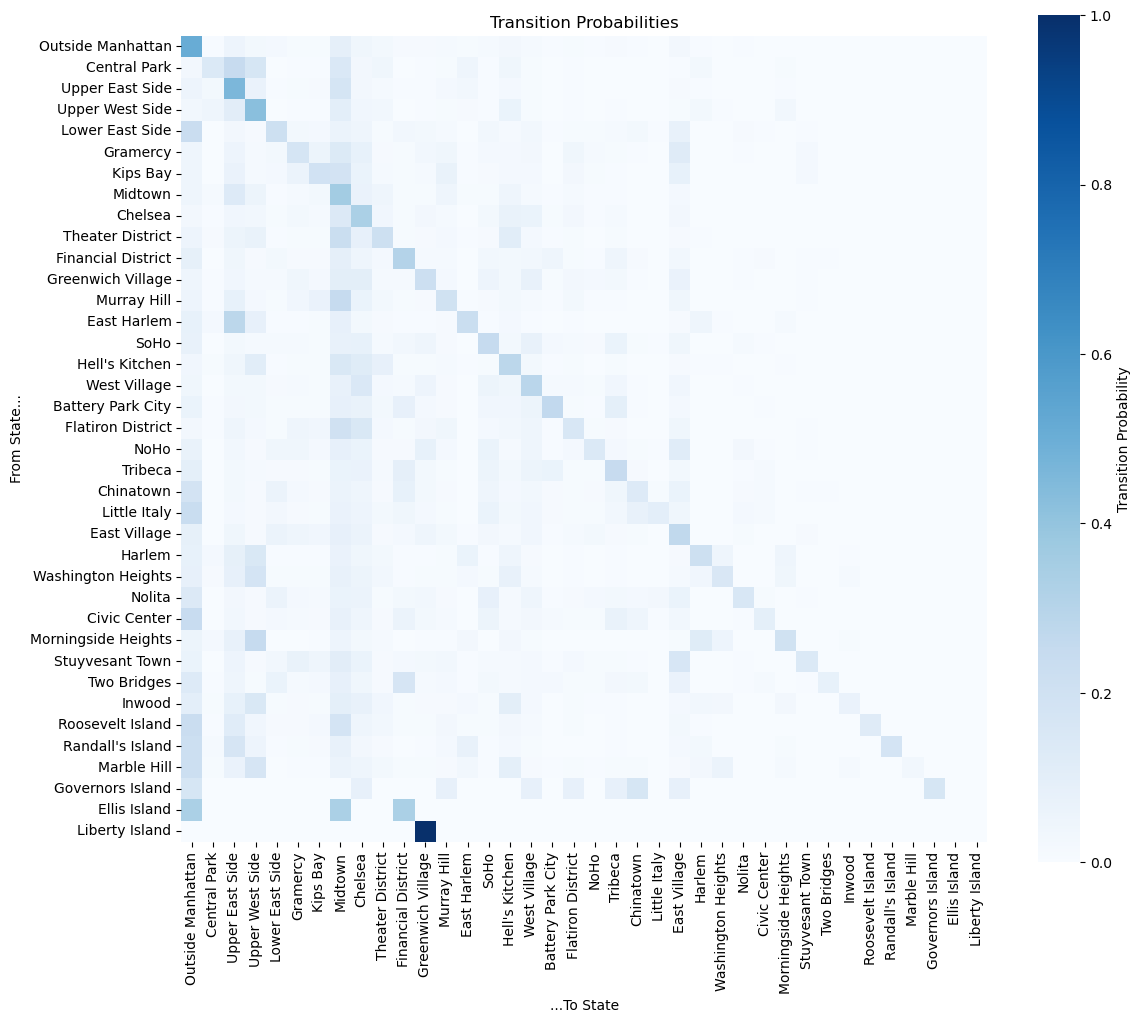

In [60]:
import matplotlib.pyplot as plt

plt.figure(figsize=(13, 11))
sns.heatmap(tr_pr, 
            cmap='Blues',
            square=True,          
            xticklabels=states,
            yticklabels=states,
            cbar_kws={'label': 'Transition Probability'})

plt.title('Transition Probabilities')
plt.xlabel('...To State')
plt.ylabel('From State...')
plt.show()

The most common routes are: Ellis lsland to outsie Manhattan, and Liberty Island to Greenwich Village.

Taxi trips are likely order 1 because the passenger of the taxi determines the trip sequence, and the passenger will be different for every transition.

In [62]:
state_index = states.index("Hell's Kitchen") # Get the index of the initial state

##Initial density:
density = np.zeros(len(states))
density[state_index] = 1

for k in range(10):
    density = tr_pr_1 @ density
    print(density)

[0.0273768  0.03924127 0.01985878 0.06531138 0.01771996 0.01994946
 0.02078554 0.04775457 0.07090851 0.10983876 0.02501834 0.02378078
 0.02553242 0.0217132  0.0240477  0.2828562  0.04142249 0.03603258
 0.03160401 0.01875807 0.02558418 0.02151553 0.02345046 0.01935429
 0.04941267 0.07636629 0.01900644 0.01875227 0.03122638 0.01751296
 0.01896419 0.10368921 0.02958801 0.02081599 0.09533469 0.
 0.         0.        ]
[0.04030856 0.05158912 0.03804872 0.06717047 0.03311535 0.03722573
 0.03820099 0.05484202 0.06726055 0.08388539 0.03880376 0.0407673
 0.04279803 0.03808768 0.03936431 0.11918454 0.05130938 0.04605408
 0.04837596 0.03482553 0.03986695 0.03539951 0.03746769 0.03441674
 0.05748282 0.06943868 0.03444893 0.03546243 0.05468554 0.03435991
 0.03407283 0.07489756 0.04396649 0.03624589 0.06990671 0.02601588
 0.03338324 0.02378078]
[0.04662219 0.05425205 0.04725314 0.06216119 0.04265252 0.04597869
 0.04675822 0.05487692 0.06015236 0.06617909 0.04586736 0.04805915
 0.04952075 0.04704579 

In [65]:
state_index = states.index("Hell's Kitchen") # Get the index of the initial state

##Initial density:
density = np.zeros(len(states))
density[state_index] = 1
density_list = []
for k in range(7):
    density = tr_pr_1 @ density
    density_list.append(density)
print(density_list[-3:])

[array([0.05148131, 0.05427043, 0.05270794, 0.05604816, 0.05049471,
       0.05171126, 0.05202295, 0.05382622, 0.05449891, 0.05549662,
       0.05127785, 0.05215245, 0.05273262, 0.05270727, 0.05163316,
       0.05658255, 0.05309623, 0.05214453, 0.05331041, 0.05108979,
       0.05150441, 0.05072353, 0.05095516, 0.05090698, 0.05482777,
       0.05530306, 0.05077639, 0.05096516, 0.05583783, 0.05113249,
       0.05071341, 0.05500155, 0.05244507, 0.05184496, 0.05449488,
       0.0503284 , 0.05117397, 0.05095537]), array([0.05234853, 0.05397661, 0.05323909, 0.05479821, 0.05185018,
       0.05252164, 0.05270541, 0.05359516, 0.05376418, 0.05425839,
       0.05222248, 0.0526946 , 0.05305888, 0.05326781, 0.0524011 ,
       0.05470812, 0.05309487, 0.0526212 , 0.05327913, 0.05217527,
       0.05231591, 0.05194634, 0.05204664, 0.0520939 , 0.05419412,
       0.05433207, 0.05198652, 0.05207467, 0.05477398, 0.05223403,
       0.05196915, 0.05412825, 0.05289406, 0.05273163, 0.05388334,
       0.0517596

From the outcomes above, the results started settling down after the 7th iteration. It looks like that taxi drivers spend almost equal time in all the state spaces of Manhanttan 